# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Aminat Owodunni

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [2]:
df = pd.read_csv('salary.csv')
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# Check unique categories
df['Salary'].value_counts() ,df['Workclass'].value_counts(), df['Occupation'].value_counts(), df['Country'].value_counts()

( <=50K    24719
  >50K      7841
 Name: Salary, dtype: int64,
  Private             22696
  Self-emp-not-inc     2541
  Local-gov            2093
  ?                    1836
  State-gov            1297
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name: Workclass, dtype: int64,
  Prof-specialty       4140
  Craft-repair         4099
  Exec-managerial      4066
  Adm-clerical         3769
  Sales                3650
  Other-service        3295
  Machine-op-inspct    2002
  ?                    1843
  Transport-moving     1597
  Handlers-cleaners    1370
  Farming-fishing       994
  Tech-support          928
  Protective-serv       649
  Priv-house-serv       149
  Armed-Forces            9
 Name: Occupation, dtype: int64,
  United-States                 29169
  Mexico                          643
  ?                               583
  Philippines                     198
  Germany                         137
  Canada  

In [4]:
# Replace missing values in categorical features
df['Workclass']=df['Workclass'].str.replace('?','Private')
df['Occupation']=df['Occupation'].str.replace('?','Other-service')
df['Country']=df['Country'].str.replace('?','Unknown')

# Relace target variable
df['Salary'] =df['Salary'].str.replace('<=50K','0')
df['Salary'] =df['Salary'].str.replace('>50K','1')

C:\Users\Aminat\AppData\Local\Temp\ipykernel_6048\2923858086.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Workclass']=df['Workclass'].str.replace('?','Private')
C:\Users\Aminat\AppData\Local\Temp\ipykernel_6048\2923858086.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Occupation']=df['Occupation'].str.replace('?','Other-service')
C:\Users\Aminat\AppData\Local\Temp\ipykernel_6048\2923858086.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Country']=df['Country'].str.replace('?','Unknown')


In [5]:
# Convert salary to int data type
df['Salary']= df['Salary'].astype(int)

In [6]:
df['Salary'].value_counts(), df['Workclass'].value_counts(), df['Occupation'].value_counts(), df['Country'].value_counts()

(0    24719
 1     7841
 Name: Salary, dtype: int64,
  Private             24532
  Self-emp-not-inc     2541
  Local-gov            2093
  State-gov            1297
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name: Workclass, dtype: int64,
  Other-service        5138
  Prof-specialty       4140
  Craft-repair         4099
  Exec-managerial      4066
  Adm-clerical         3769
  Sales                3650
  Machine-op-inspct    2002
  Transport-moving     1597
  Handlers-cleaners    1370
  Farming-fishing       994
  Tech-support          928
  Protective-serv       649
  Priv-house-serv       149
  Armed-Forces            9
 Name: Occupation, dtype: int64,
  United-States                 29169
  Mexico                          643
  Unknown                         583
  Philippines                     198
  Germany                         137
  Canada                          121
  Puerto-Rico                     114


In [7]:
# Cut capital_gain and loss into bins
df['Capital_gain']= df['Capital_gain'].replace(0,np.nan)
df['Capital_loss']= df['Capital_loss'].replace(0,np.nan)

df['Capital_gain_cut']= pd.cut(df['Capital_gain'],bins=5,labels=['low','fair','medium','moderate','high'])
df['Capital_loss_cut']= pd.cut(df['Capital_loss'],bins=5,labels=['low','fair','medium','moderate','high'])

In [8]:
df.sample(5)

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Capital_gain_cut,Capital_loss_cut
6859,18,Private,202516,HS-grad,9,Never-married,Other-service,Own-child,White,Female,NaN,NaN,35,United-States,0,NaN,NaN
2332,35,Private,199288,11th,7,Separated,Transport-moving,Not-in-family,White,Male,NaN,NaN,90,United-States,0,NaN,NaN
15639,24,Private,196675,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,NaN,NaN,70,United-States,0,NaN,NaN
25375,21,Private,156687,Some-college,10,Never-married,Sales,Own-child,Asian-Pac-Islander,Male,NaN,NaN,30,India,0,NaN,NaN
29002,27,Private,165519,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,40,United-States,0,NaN,NaN


In [9]:
df.dtypes

Age                    int64
Workclass             object
Final_weight           int64
Education             object
Education_num          int64
Marital_status        object
Occupation            object
Relationship          object
Race                  object
Sex                   object
Capital_gain         float64
Capital_loss         float64
Hours_per_week         int64
Country               object
Salary                 int32
Capital_gain_cut    category
Capital_loss_cut    category
dtype: object

In [10]:
# Init the constant
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = 'Salary'
TO_DROP = ['Salary','Capital_gain','Capital_loss','Education_num']

In [11]:
# Split data into train and test
from sklearn.model_selection import train_test_split

# Independent features (Matrix)
X = df.drop(columns=TO_DROP)

# Target variable (Vector)
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape

((26048, 13), (6512, 13))

In [12]:
# check nan values
X_train.isna().sum(),X_test.isna().sum()

(Age                     0
 Workclass               0
 Final_weight            0
 Education               0
 Marital_status          0
 Occupation              0
 Relationship            0
 Race                    0
 Sex                     0
 Hours_per_week          0
 Country                 0
 Capital_gain_cut    23874
 Capital_loss_cut    24823
 dtype: int64,
 Age                    0
 Workclass              0
 Final_weight           0
 Education              0
 Marital_status         0
 Occupation             0
 Relationship           0
 Race                   0
 Sex                    0
 Hours_per_week         0
 Country                0
 Capital_gain_cut    5975
 Capital_loss_cut    6218
 dtype: int64)

In [13]:
# Replace NaNs in train and test set

X_train["Capital_gain_cut"] = X_train["Capital_gain_cut"].astype(str).fillna('None')
X_train["Capital_loss_cut"] = X_train["Capital_loss_cut"].astype(str).fillna('None')
X_test["Capital_gain_cut"] = X_test["Capital_gain_cut"].astype(str).fillna('None')
X_test["Capital_loss_cut"] = X_test["Capital_loss_cut"].astype(str).fillna('None')

X_train["Capital_gain_cut"] = X_train["Capital_gain_cut"].replace('nan','None')
X_train["Capital_loss_cut"] = X_train["Capital_loss_cut"].replace('nan','None')
X_test["Capital_gain_cut"] = X_test["Capital_gain_cut"].replace('nan','None')
X_test["Capital_loss_cut"] = X_test["Capital_loss_cut"].replace('nan','None')

In [14]:
# recheck nan values
X_train.isna().sum(),X_test.isna().sum()

(Age                 0
 Workclass           0
 Final_weight        0
 Education           0
 Marital_status      0
 Occupation          0
 Relationship        0
 Race                0
 Sex                 0
 Hours_per_week      0
 Country             0
 Capital_gain_cut    0
 Capital_loss_cut    0
 dtype: int64,
 Age                 0
 Workclass           0
 Final_weight        0
 Education           0
 Marital_status      0
 Occupation          0
 Relationship        0
 Race                0
 Sex                 0
 Hours_per_week      0
 Country             0
 Capital_gain_cut    0
 Capital_loss_cut    0
 dtype: int64)

In [15]:
X_train.head()

,Age,Workclass,Final_weight,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Country,Capital_gain_cut,Capital_loss_cut
6994,20,Private,168863,Some-college,Never-married,Other-service,Own-child,White,Female,20,United-States,None,None
17064,22,Private,270436,HS-grad,Never-married,Other-service,Own-child,White,Male,40,United-States,None,None
18434,36,Self-emp-not-inc,405644,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,35,Mexico,None,None
3294,22,Private,51136,Some-college,Never-married,Tech-support,Not-in-family,White,Female,60,United-States,None,None
31316,23,Private,50953,Some-college,Never-married,Tech-support,Not-in-family,White,Female,40,United-States,None,None


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [17]:
# Feature Engineering

vars_to_scale = ['Age', 'Final_weight', 'Hours_per_week']
vars_to_enc = ['Workclass', 'Education','Marital_status', 'Occupation', 'Relationship',
               'Race', 'Sex', 'Country','Capital_gain_cut', 'Capital_loss_cut']

# ===== OHE =====
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")

# ===== Scaler =====
scaler = MinMaxScaler()

col_transformer = ColumnTransformer(
    transformers=[("ohe", ohe, vars_to_enc), ("scaler", scaler, vars_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Workclass', 'Education', 'Marital_status',
                                  'Occupation', 'Relationship', 'Race', 'Sex',
                                  'Country', 'Capital_gain_cut',
                                  'Capital_loss_cut']),
                                ('scaler', MinMaxScaler(),
                                 ['Age', 'Final_weight', 'Hours_per_week'])])

In [18]:
ohe_ = OneHotEncoder(dtype=int, handle_unknown="ignore")
transf = ohe_.fit_transform(X_train).toarray()

df_enc = pd.DataFrame(data=transf, columns=ohe_.get_feature_names_out())
df_enc.head()

,Age_17,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34,Age_35,Age_36,Age_37,Age_38,Age_39,Age_40,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_57,Age_58,Age_59,Age_60,Age_61,Age_62,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70,Age_71,Age_72,Age_73,Age_74,Age_75,Age_76,Age_77,Age_78,Age_79,Age_80,Age_81,Age_82,Age_83,Age_84,Age_85,Age_86,Age_88,Age_90,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Final_weight_12285,Final_weight_19214,Final_weight_19302,Final_weight_19410,Final_weight_19491,Final_weight_19520,Final_weight_19700,Final_weight_19752,Final_weight_19793,Final_weight_19847,Final_weight_19899,Final_weight_19914,Final_weight_20057,Final_weight_20179,Final_weight_20296,Final_weight_20308,Final_weight_20323,Final_weight_20333,Final_weight_20438,Final_weight_20469,Final_weight_20507,Final_weight_20534,Final_weight_20676,Final_weight_20728,Final_weight_20795,Final_weight_20809,Final_weight_20953,Final_weight_20956,Final_weight_21101,Final_weight_21154,Final_weight_21174,Final_weight_21306,Final_weight_21472,Final_weight_21626,Final_weight_21698,Final_weight_21792,Final_weight_21856,Final_weight_21876,Final_weight_21906,Final_weight_22042,Final_weight_22055,Final_weight_22155,Final_weight_22186,Final_weight_22201,Final_weight_22211,Final_weight_22245,Final_weight_22313,Final_weight_22328,Final_weight_22418,Final_weight_22422,Final_weight_22428,Final_weight_22463,Final_weight_22494,Final_weight_22546,Final_weight_22641,Final_weight_22743,Final_weight_22831,Final_weight_22900,Final_weight_22966,Final_weight_22978,Final_weight_23037,Final_weight_23074,Final_weight_23157,Final_weight_23233,Final_weight_23324,Final_weight_23438,Final_weight_23494,Final_weight_23510,Final_weight_23545,Final_weight_23580,Final_weight_23621,Final_weight_23646,Final_weight_23686,Final_weight_23698,Final_weight_23776,Final_weight_23778,Final_weight_23780,Final_weight_23789,Final_weight_23813,Final_weight_23871,Final_weight_23892,Final_weight_23940,Final_weight_24008,Final_weight_24046,Final_weight_24050,Final_weight_24090,Final_weight_24106,Final_weight_24108,Final_weight_24127,Final_weight_24139,Final_weight_24153,Final_weight_24185,Final_weight_24215,Final_weight_24243,Final_weight_24264,Final_weight_24266,Final_weight_24292,Final_weight_24342,Final_weight_24364,Final_weight_24384,Final_weight_24395,Final_weight_24473,Final_weight_24504,Final_weight_24515,Final_weight_24529,Final_weight_24562,Final_weight_24647,Final_weight_24721,Final_weight_24723,Final_weight_24728,Final_weight_24763,Final_weight_24790,Final_weight_24824,Final_weight_24872,Final_weight_24896,Final_weight_24961,Final_weight_24967,Final_weight_24982,Final_weight_25005,Final_weight_25045,Final_weight_25051,Final_weight_25124,Final_weight_25139,Final_weight_25141,Final_weight_25240,Final_weight_25265,Final_weight_25322,Final_weight_25429,Final_weight_25468,Final_weight_25497,Final_weight_25505,Final_weight_25610,Final_weight_25631,Final_weight_25649,Final_weight_25684,Final_weight_25690,Final_weight_25803,Final_weight_25825,Final_weight_25826,Final_weight_25828,Final_weight_25837,Final_weight_25864,Final_weight_25955,Final_weight_26009,Final_weight_26109,Final_weight_26145,Final_weight_26248,Final_weight_26254,Final_weight_26401,Final_weight_26410,Final_weight_26451,Final_weight_26490,Final_weight_26502,Final_weight_26522,Final_weight_26543,Final_weight_26553,Final_weight_26598,Final_weight_26620,Final_weight_26669,Final_weight_26671,Final_weight_26672,Final_weight_26683,Final_weight_26698,Final_weight_26716,Final_weight_26756,Final_weight_26781,Final_weight_26803,Final_weight_26832,Final_weight_26842,Final_weight_26857,Final_weight_26865,Final_weight_26880,Final_weight_26892,Final_weight_26898,Final_

In [19]:
#tr = col_transformer.fit_transform(X_train)
#pd.DataFrame(tr, columns=col_transformer.get_feature_names_out()).head()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# Init
logit = LogisticRegression(random_state=RANDOM_STATE)


pipe_logit = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_transformer),
        # ===== log Model =====
        ("logit", logit)
    ]
)

pipe_logit

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country',
                                                   'Capital_gain_cut',
                                                   'Capital_loss_cut']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Hours_per_week'])])),
                ('logit', LogisticRegression(random_state=123))])

In [21]:
# Fit
pipe_logit.fit(X_train, y_train)

# Make predictions
y_pred = pipe_logit.predict(X_test)

# 
y_proba = pipe_logit.predict_proba(X_test)[:, 1]

C:\Users\Aminat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [23]:
pipe_logit.predict_proba(X_test)[:, 1]

array([0.47234768, 0.51975268, 0.00722885, ..., 0.14820919, 0.11615703,
       0.08192118])

In [24]:
y_test.value_counts(normalize=True)

0    0.763206
1    0.236794
Name: Salary, dtype: float64

In [25]:
# Evaluate Model
labels = ['0', '1']
labels = ["50K and below", "Above 50K"]


conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[4618,  352],
       [ 593,  949]], dtype=int64)

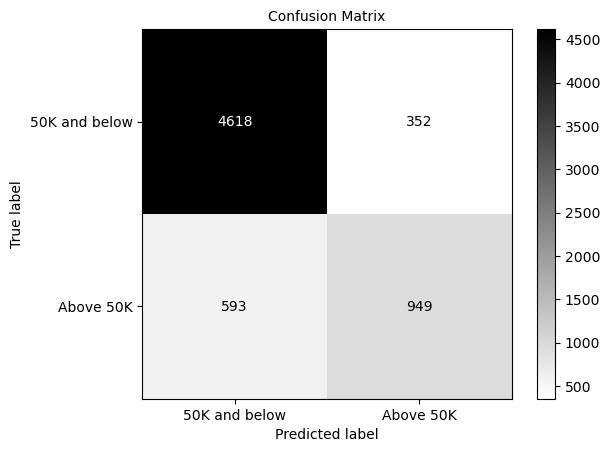

In [26]:
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Display Confusion Matix
import matplotlib.pyplot as plt
disp.plot(cmap=plt.cm.gray_r)
plt.title("Confusion Matrix", size=10)
plt.show()

In [27]:
clf_report_1 = metrics.classification_report(y_true=y_test, y_pred=y_pred)

print(clf_report_1)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4970
           1       0.73      0.62      0.67      1542

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.85      0.85      0.85      6512



In [28]:
# Accuracy score_logit
pipe_logit.score(X_test,y_test)

0.8548832923832924

In [29]:
# Model 1 auc_score_logit
auc_score_1 = metrics.roc_auc_score(y_true=y_test, y_score=y_proba)
auc_score_1

0.9067725418659819

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_proba)

auc_score_1 = metrics.auc(fpr, tpr)
auc_score_1

0.9067725418659819

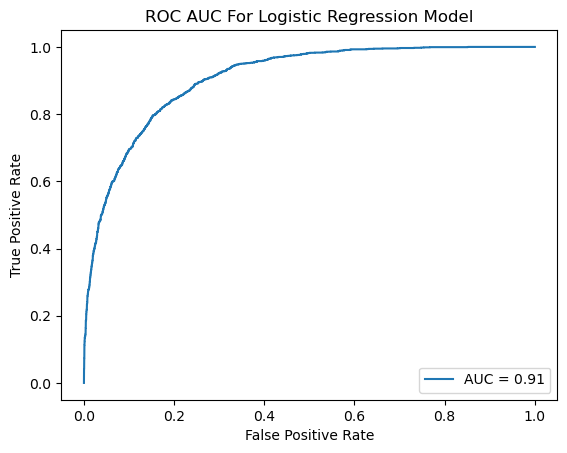

In [31]:
display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score_1, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")

plt.show()

In [32]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Init
logit = LogisticRegression(random_state=RANDOM_STATE)

pipe_dec_tree = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_transformer),
        # ===== log Model =====
        ("logit", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ]
)

pipe_dec_tree

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country',
                                                   'Capital_gain_cut',
                                                   'Capital_loss_cut']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Hours_per_week'])])),
                ('logit', DecisionTreeClassifier(random_state=123))])

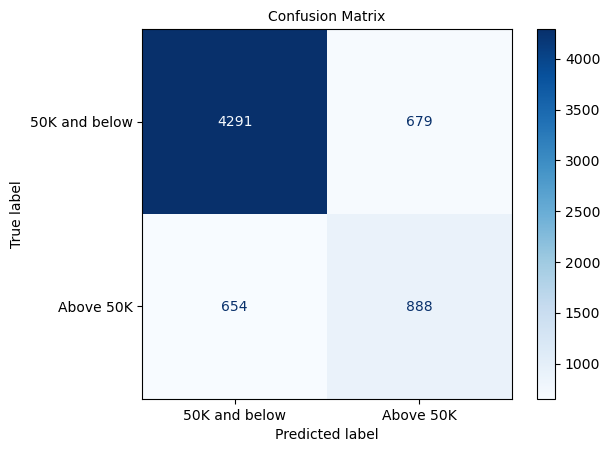

In [33]:
# Fit
pipe_dec_tree.fit(X_train, y_train)

# Make predictions
y_pred_2 = pipe_dec_tree.predict(X_test)

#
y_proba_2 = pipe_dec_tree.predict_proba(X_test)[:, 1]

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_2)

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Display Confusion Matix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix", size=10)
plt.show()

In [34]:
clf_report_2 = metrics.classification_report(y_true=y_test, y_pred=y_pred_2)

print(clf_report_2)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4970
           1       0.57      0.58      0.57      1542

    accuracy                           0.80      6512
   macro avg       0.72      0.72      0.72      6512
weighted avg       0.80      0.80      0.80      6512



In [35]:
# Accuracy_score_decision tree
pipe_dec_tree.score(X_test,y_test)

0.7953009828009828

In [36]:
# Model 2 auc_score
auc_score_2 = metrics.roc_auc_score(y_true=y_test, y_score=y_proba_2)
auc_score_2

0.7196278840357319

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_proba_2)

auc_score_2 = metrics.auc(fpr, tpr)
auc_score_2

0.7196278840357319

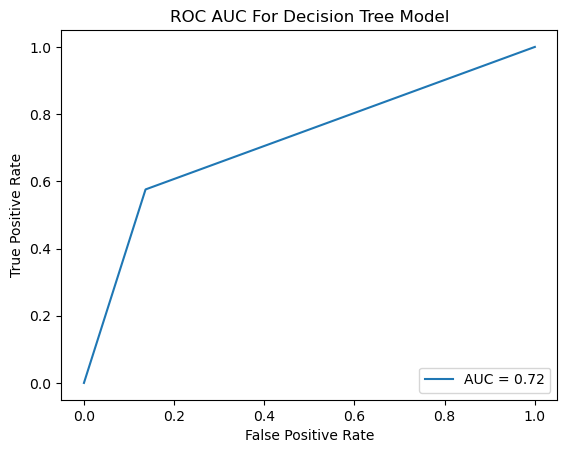

In [38]:
display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score_2, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Decision Tree Model")

plt.show()